<a href="https://colab.research.google.com/github/laumojo10/binance-investment-project/blob/main/Proyectos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Creación de Bot texto en negrita**

In [1]:
!pip install ccxt requests yfinance ta pandas numpy scipy torch matplotlib seaborn plotly python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00
   

In [2]:
import ccxt
import requests
import time
import yfinance  as yf
import ta
import pandas as pd
import numpy  as np
from scipy.optimize import minimize
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#from binance.client import Client

In [3]:
from binance.client import Client

In [4]:
# Configura tus claves de API (obténlas desde Binance)
API_KEY = "A0qBhK6SlZkAEty05D4Oj16L4PAdCsCiTpUqkb4DbeT6leDv3ofIZOxpSU20Ps6z"
API_SECRET = "R04BSkajiI4LrwbBy3nVKkXhatOvygyxIh8DyQ01IAto1jUPEeiIomk7nWfVfy59"

In [5]:
response = requests.get("https://api.binance.com/api/v3/ping")
print(response.status_code, response.text)

451 {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}


In [73]:
# Inicializa el cliente de Binance
client = Client(API_KEY, API_SECRET,tld="us")

In [74]:
# Define la criptomoneda a monitorear
symbol = "BTC/USDT"  # Puedes cambiarlo por ETH/USDT, EUR/USDT, etc.
alert_price = 40000  # Precio de alerta

In [75]:
# Conectar con Binance usando CCXT
exchange = ccxt.binance()


In [107]:
# Get historical klines (candlestick) data for BTC/USDT (1-day interval)
klines = client.get_klines(symbol="BTCUSDT", interval=Client.KLINE_INTERVAL_1DAY)

# Convert to DataFrame
df = pd.DataFrame(klines, columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume',
                                   'CloseTime', 'QuoteVolume', 'Trades', 'TakerBaseVol', 'TakerQuoteVol', 'Ignore'])

# Convert Close price to float and timestamp to readable format
df['Close'] = df['Close'].astype(float)
df['Time'] = pd.to_datetime(df['Time'], unit='ms')

# Print last 5 rows
print(df[['Time', 'Close']].tail())

          Time     Close
495 2025-02-12  97712.99
496 2025-02-13  96550.39
497 2025-02-14  97477.75
498 2025-02-15  97571.43
499 2025-02-16  97409.12


In [77]:
# Fetch BTC/USDT historical klines with a 4-hour interval
klines = client.get_klines(symbol="BTCUSDT", interval=Client.KLINE_INTERVAL_4HOUR)

# Convert to DataFrame
df = pd.DataFrame(klines, columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume',
                                   'CloseTime', 'QuoteVolume', 'Trades', 'TakerBaseVol', 'TakerQuoteVol', 'Ignore'])

# Convert Close price to float and timestamp to readable format
df['Close'] = df['Close'].astype(float)
df['Time'] = pd.to_datetime(df['Time'], unit='ms')

# Print last 5 rows
print(df[['Time', 'Close']].tail(20))

                   Time     Close
480 2025-02-12 20:00:00  97712.99
481 2025-02-13 00:00:00  97380.05
482 2025-02-13 04:00:00  96036.53
483 2025-02-13 08:00:00  95943.23
484 2025-02-13 12:00:00  95936.36
485 2025-02-13 16:00:00  95672.44
486 2025-02-13 20:00:00  96550.39
487 2025-02-14 00:00:00  97012.33
488 2025-02-14 04:00:00  96900.93
489 2025-02-14 08:00:00  96908.69
490 2025-02-14 12:00:00  96860.20
491 2025-02-14 16:00:00  97924.11
492 2025-02-14 20:00:00  97477.75
493 2025-02-15 00:00:00  97701.82
494 2025-02-15 04:00:00  97435.82
495 2025-02-15 08:00:00  97636.01
496 2025-02-15 12:00:00  97518.60
497 2025-02-15 16:00:00  97513.93
498 2025-02-15 20:00:00  97571.43
499 2025-02-16 00:00:00  97445.54


In [86]:
# Fetch BTC/USDT historical klines with a 4-hour interval
klines = client.get_klines(symbol="BTCUSDT", interval=Client.KLINE_INTERVAL_1WEEK)

# Convert to DataFrame
df = pd.DataFrame(klines, columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume',
                                   'CloseTime', 'QuoteVolume', 'Trades', 'TakerBaseVol', 'TakerQuoteVol', 'Ignore'])

# Convert Close price to float and timestamp to readable format
df['Close'] = df['Close'].astype(float)
df['Time'] = pd.to_datetime(df['Time'], unit='ms')

# Print last 5 rows
print(df[['Time', 'Close']].tail(20))

          Time      Close
262 2024-09-30   62807.02
263 2024-10-07   62857.80
264 2024-10-14   69029.51
265 2024-10-21   67900.00
266 2024-10-28   68724.23
267 2024-11-04   80452.94
268 2024-11-11   89792.00
269 2024-11-18   97700.51
270 2024-11-25   97249.75
271 2024-12-02  101159.43
272 2024-12-09  104334.87
273 2024-12-16   95119.37
274 2024-12-23   93861.71
275 2024-12-30   98300.03
276 2025-01-06   94455.62
277 2025-01-13  101032.19
278 2025-01-20  102618.04
279 2025-01-27   97692.60
280 2025-02-03   96426.86
281 2025-02-10   97409.12


In [108]:
print(df['Close'].tail(20))
df = df['Close']
print(df.tail(20))

480    101396.65
481    103603.88
482    104789.27
483    102424.11
484    100594.76
485     97692.60
486    101437.32
487     97819.04
488     96595.25
489     96634.00
490     96463.26
491     96497.55
492     96426.86
493     97456.17
494     95748.61
495     97712.99
496     96550.39
497     97477.75
498     97571.43
499     97409.12
Name: Close, dtype: float64
480    101396.65
481    103603.88
482    104789.27
483    102424.11
484    100594.76
485     97692.60
486    101437.32
487     97819.04
488     96595.25
489     96634.00
490     96463.26
491     96497.55
492     96426.86
493     97456.17
494     95748.61
495     97712.99
496     96550.39
497     97477.75
498     97571.43
499     97409.12
Name: Close, dtype: float64


In [88]:
# Calculate 200-day moving average
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Print result
print(df)

          Time             Open             High             Low      Close  \
0   2019-09-23    9930.13000000    9930.13000000   7761.87000000    8047.12   
1   2019-09-30    8058.25000000    8498.23000000   7744.23000000    7866.87   
2   2019-10-07    7860.25000000    8772.46000000   7772.14000000    8276.97   
3   2019-10-14    8273.46000000    8400.92000000   7825.00000000    8220.22   
4   2019-10-21    8222.00000000   10352.43000000   7310.24000000    9530.88   
..         ...              ...              ...             ...        ...   
277 2025-01-13   94561.19000000  106351.62000000  89438.45000000  101032.19   
278 2025-01-20  101032.80000000  109461.87000000  99611.36000000  102618.04   
279 2025-01-27  102618.04000000  106300.00000000  96501.73000000   97692.60   
280 2025-02-03   97702.50000000  102326.68000000  92197.00000000   96426.86   
281 2025-02-10   96514.66000000   98668.27000000  94246.95000000   97409.12   

            Volume      CloseTime        QuoteVolum

In [90]:
for_last_SMA200=df['Close'].iloc[-1]
print(for_last_SMA200)

97409.12


In [92]:
last_SMA200=df['Close'].iloc[-2]
print(last_SMA200)

96426.86


In [93]:
# Sample data: Assume you have a DataFrame with a 'Close' column
bull_market_criteria = (last_SMA200 - for_last_SMA200)/for_last_SMA200
print(bull_market_criteria)

alpha_bull=0.01
if bull_market_criteria > alpha_bull:
    print("bull market")
else:
    print("bear market")

-0.010083860730904814
bear market


In [95]:
ff =df['Close'].iloc[-1]
f2 = df['200_MA'].iloc[-1]
print(ff)
print(f2)

97409.12
44182.15149999999


In [20]:
criteria_2 = (ff -f2)/f2
alpha_bull_2= 0.01
if criteria_2 >alpha_bull_2:
    print("bull market")
else:
    print("bear market")

bull market


DCA

In [96]:
#DCA: dollar cost average
#constant investing quantities in regular periods of time


In [97]:

    # Obtener el precio actual de Bitcoin (BTC/USDT)
    price = client.get_symbol_ticker(symbol="BTCUSDT")["price"]
    price = float(price)
    print(f"Precio actual de BTC/USDT: {price}")
    # Esperar 1 minuto (60 segundos)


Precio actual de BTC/USDT: 97409.12


In [98]:
df_precio=pd.DataFrame([[price]],columns=['price_Actual'])

In [99]:
precio_Actual=df_precio['price_Actual'].iloc[0]
print(precio_Actual)

97409.12


In [100]:
price_lastday_close=df_precio['price_Actual'].iloc[-1]
print(price_lastday_close)

97409.12


In [101]:
print(precio_Actual)
print(price_lastday_close)


97409.12
97409.12


In [102]:
x = (precio_Actual - price_lastday_close)/price_lastday_close
alpha_Day = -0.02
if x < alpha_Day:
  print("investment ok")
else:
  print("investment not ok")

investment not ok


**Channeling**

Momentun precedes price

In [103]:
def calculate_rsi(Close, period=14):
    """Calculate the Relative Strength Index (RSI)."""
    delta = Close.diff()
    gains = np.where(delta > 0, delta, 0)
    losses = np.where(delta < 0, -delta, 0)

    gains = pd.Series(gains, index=Close.index)
    losses = pd.Series(losses, index=Close.index)

    avg_gain = gains.ewm(span=period, adjust=False).mean()
    avg_loss = losses.ewm(span=period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [109]:
def plot_rsi(Close, period=14):

    rsi = calculate_rsi(df, period)

    plt.figure(figsize=(10, 5))
    plt.plot(rsi, label="RSI (14)", color="blue", linewidth=1.5)
    plt.axhline(70, color='red', linestyle='dashed', alpha=0.7, label="Overbought (70)")
    plt.axhline(30, color='green', linestyle='dashed', alpha=0.7, label="Oversold (30)")
    plt.axhline(50, color='gray', linestyle='dotted', alpha=0.5, label="Neutral (50)")

    plt.title("Relative Strength Index (RSI)")
    plt.xlabel("Time")
    plt.ylabel("RSI Value")
    plt.legend()
    plt.ylim(0, 100)  # RSI ranges from 0 to 100
    plt.grid(alpha=0.3)

    plt.show()





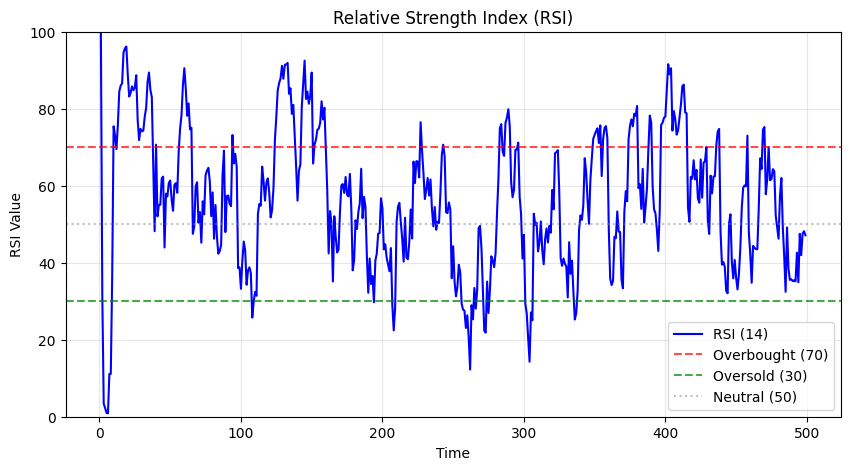

In [110]:
plot_rsi(df)